#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03D Distributions of body height and income**

height-income-distributions  dataset

version 1.0 2021-05-05

In [2]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/height-income-distributions/clean/"
data_out = dirname + "da_case_studies/ch03-distributions-height-income/"
output = dirname + "da_case_studies/ch03-distributions-height-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [4]:
# Import the prewritten helper functions
from py_helper_functions import *


ModuleNotFoundError: No module named 'py_helper_functions'

##### load in clean and tidy data and create workfile

In [ ]:
hrs = pd.read_csv("/workspaces/codespaces-jupyter/data/hrs_height_income.csv")


In [ ]:
hrs["height"] = hrs["height"].apply(pd.to_numeric, errors="coerce")


In [ ]:
filtered_women = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["height"] > 1.3)
    & (hrs["height"] < 2.1)
]

In [ ]:
hrs.height.describe()


count    18660.000000
mean         1.677539
std          0.104078
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.324100
Name: height, dtype: float64

##### graph --height

In [ ]:
hrs.height.min()

np.float64(1.0033)

In [ ]:
hrs.height.max()

np.float64(2.3241)

In [ ]:
hrs.height.count

<bound method Series.count of 0        1.6256
1        1.8034
2        1.5494
3        1.6510
4        1.7272
          ...  
18742    1.6510
18743    1.8034
18744       NaN
18745    1.8542
18746    1.6510
Name: height, Length: 18747, dtype: float64>

In [ ]:
hrs.stat

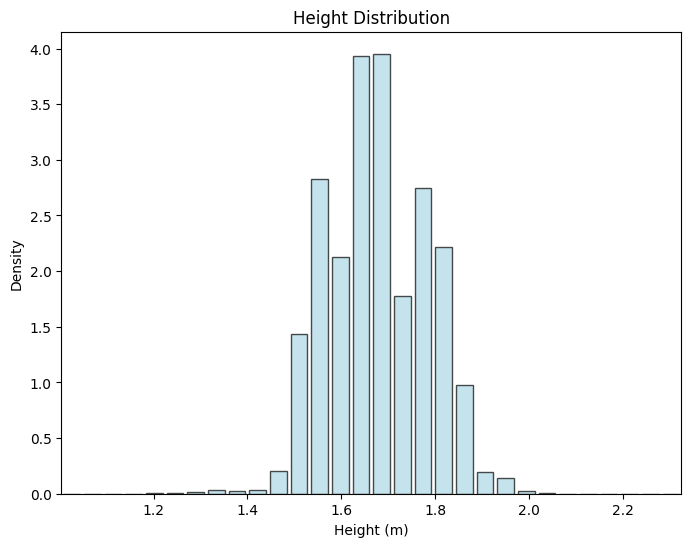

In [ ]:
hrs.height.hist(
    bins=30,
    edgecolor="black",
    color="lightblue",
    alpha=0.7,
    figsize=(8, 6),
    grid=False,
    rwidth=0.8,
    density=True,
) 
plt.xlim(hrs.height.min(), hrs.height.max())
plt.title("Height Distribution")
plt.xlabel("Height (m)")
plt.ylabel("Density")

plt.show()       




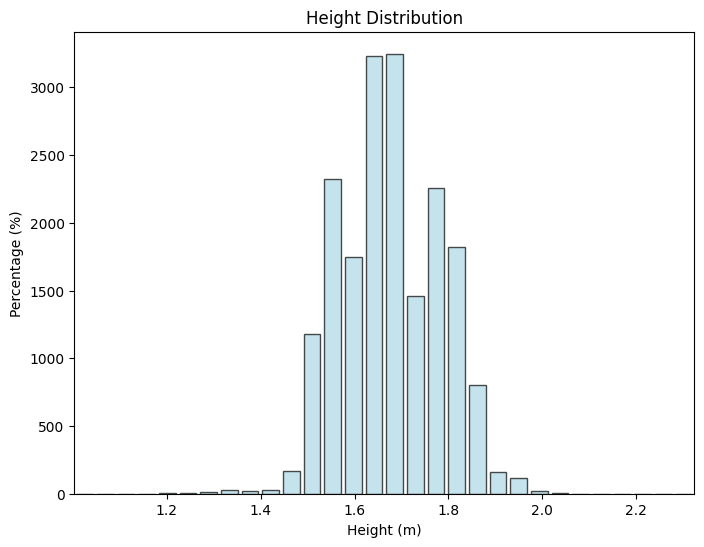

In [ ]:
import matplotlib.pyplot as plt

# Calculate the histogram data
hist_data = hrs.height.value_counts(bins=30, normalize=True) * 100

# Plot histogram with percentages
hrs.height.hist(
    bins=30,
    edgecolor="black",
    color="lightblue",
    alpha=0.7,
    figsize=(8, 6),
    grid=False,
    rwidth=0.8,
) 

# Set x-axis limits dynamically
plt.xlim(hrs.height.min(), hrs.height.max())

# Update y-axis label to show percentages
plt.ylabel("Percentage (%)")
plt.title("Height Distribution")
plt.xlabel("Height (m)")

plt.show()

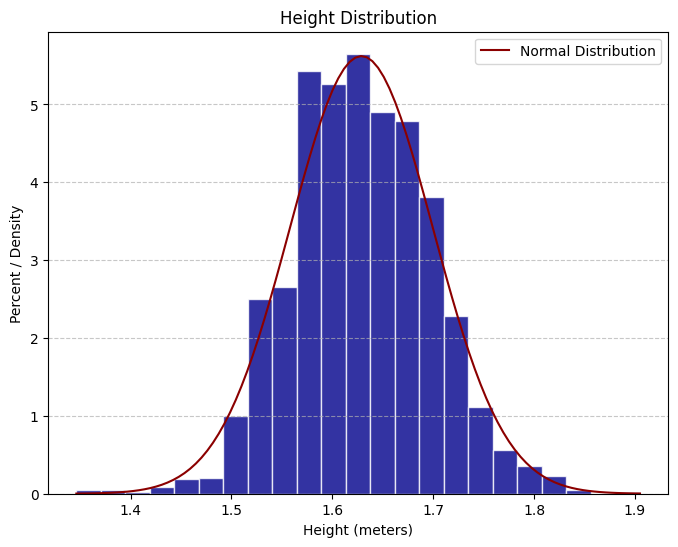

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Data preparation
data = filtered_women['height']
mean_height = np.mean(data)
std_height = np.std(data)

# Create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(
    data,
    bins=23,
    density=True,  # Normalize to show density
    color="darkblue",
    edgecolor="white",
    alpha=0.8
)

# Add normal distribution curve
x = np.linspace(data.min(), data.max(), 100)
ax.plot(x, norm.pdf(x, mean_height, std_height), color="darkred", label="Normal Distribution")

# Formatting
ax.set_ylabel("Percent / Density")
ax.set_xlabel("Height (meters)")
ax.set_title("Height Distribution")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

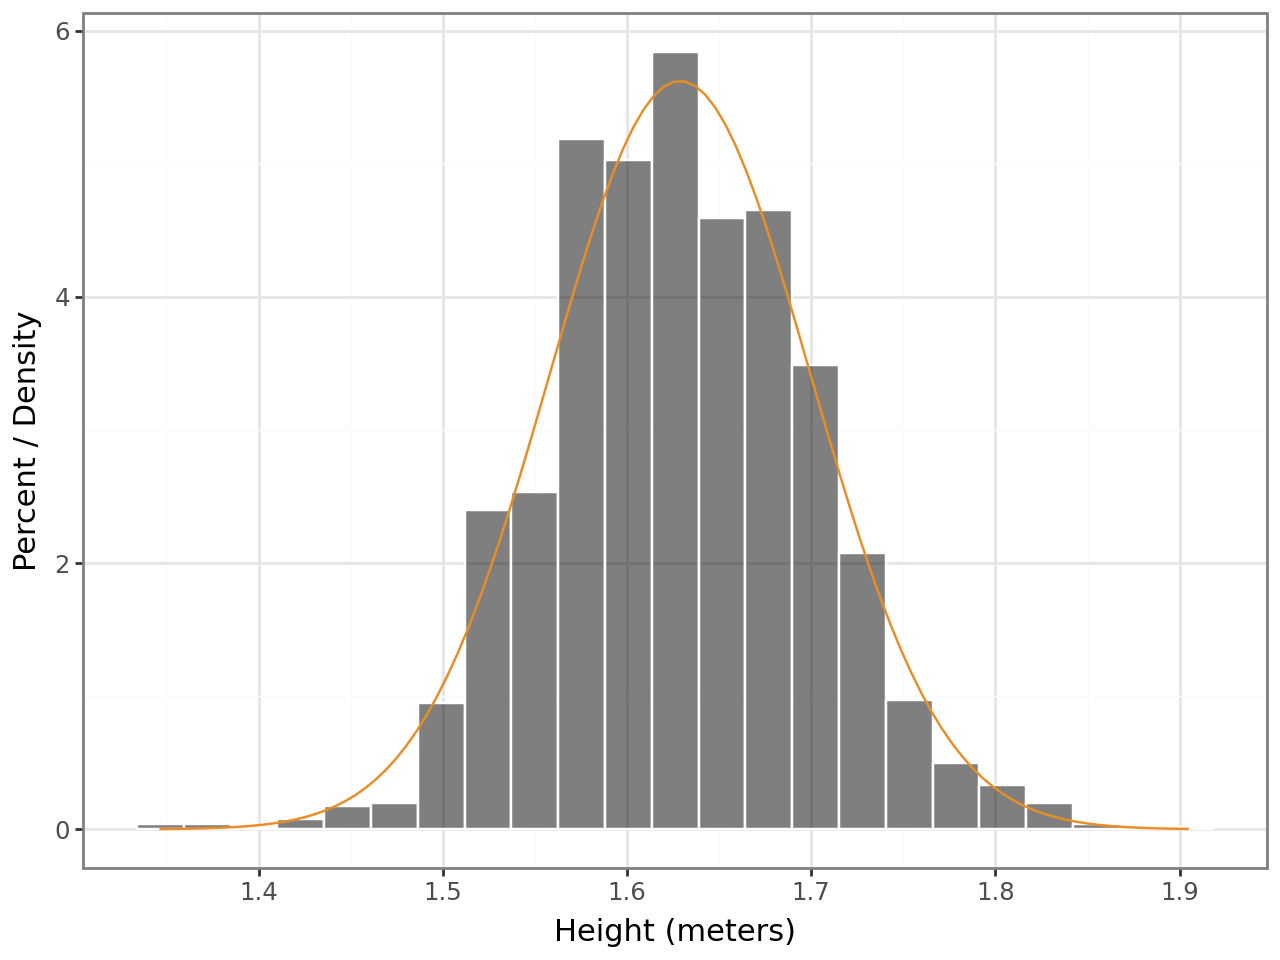

In [ ]:
(
    ggplot(filtered_women, aes(x="height")) 
    + geom_histogram(
        aes(y="stat(density)"),
        bins=23,
        fill="black",
        color="white",
        alpha=0.5,
        center=1.55,
        closed="right",
    )
    + stat_function(
        fun=norm.pdf,
        colour="#E78E28",
        args=[np.mean(filtered_women["height"]), np.std(filtered_women["height"])],
    )
    + theme_bw()
    + ylab("Percent / Density")
    + xlab("Height (meters)")
)


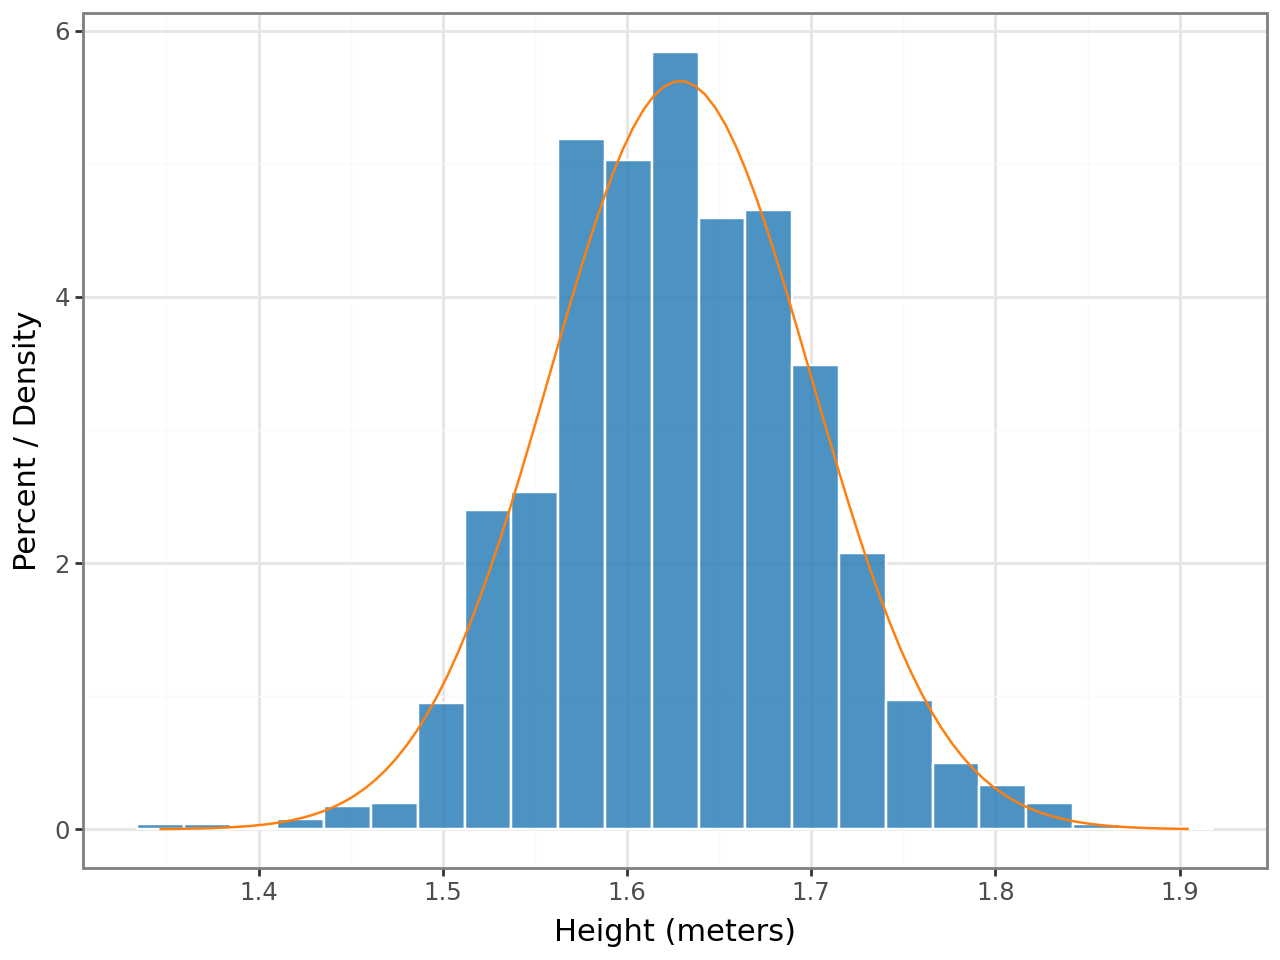

In [ ]:
(
    ggplot(filtered_women, aes(x="height"))
    + geom_histogram(
        aes(y="stat(density)"),
        bins=23,
        fill="#1f77b4",
        color="white",
        alpha=0.8,
        center=1.55,
        closed="right",
    )
    + stat_function(
        fun=norm.pdf,
        colour="#ff7f0e",
        args=[np.mean(filtered_women["height"]), np.std(filtered_women["height"])],
    )
    + theme_bw()
    + ylab("Percent / Density")
    + xlab("Height (meters)")
)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy
sns.set_style("whitegrid")

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

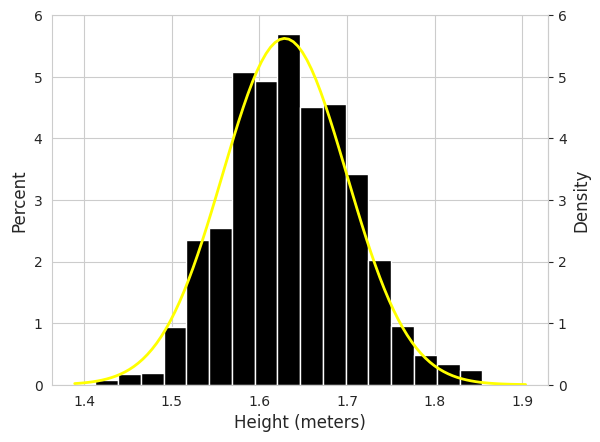

In [ ]:
fig, ax1 = plt.subplots()

# histogram
sns.histplot(
    filtered_women,
    x="height",
    stat="density",
    bins=np.round(np.arange(1.4125, 1.875 + 0.026, 0.026), 4),
    edgecolor="white",
    color="black",
    alpha=1,
    ax=ax1,
)

# calculate the norm. pdf
x0, x1 = ax1.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(
    x_pdf,
    loc=np.mean(filtered_women["height"]),
    scale=np.std(filtered_women["height"]),
)
ax1.plot(x_pdf, y_pdf, color="yellow", lw=2)

# add second axis
secax = ax1.secondary_yaxis("right")
secax.set_ylabel("Density", size=12)

# formating
plt.ylabel("Percent", size=12)
plt.xlabel("Height (meters)", size=12)
plt.yticks(np.arange(0, 7, 1))
ax1.set_yticklabels([f"{i}%" for i in np.arange(0,15,2.5)])
plt.xlim(1.4, 1.9)
add_margin(ax1, x=0.1, y=0.01)
plt.show()

##### LOGNORMAL: family income of women age 55-59 

#### income variable

In [ ]:
# filter dataset
filtered_women_income = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["hhincome"] > 1)
    & (hrs["hhincome"] < 1000)
]

In [ ]:
filtered_women_income["hhincome"].describe()


count    1918.000000
mean       74.931920
std        87.185212
min         1.200000
25%        19.704000
50%        48.000000
75%       100.800000
max       945.000000
Name: hhincome, dtype: float64

In [ ]:
# ln income
filtered_women_income["lnincome"] = np.log(filtered_women_income["hhincome"])


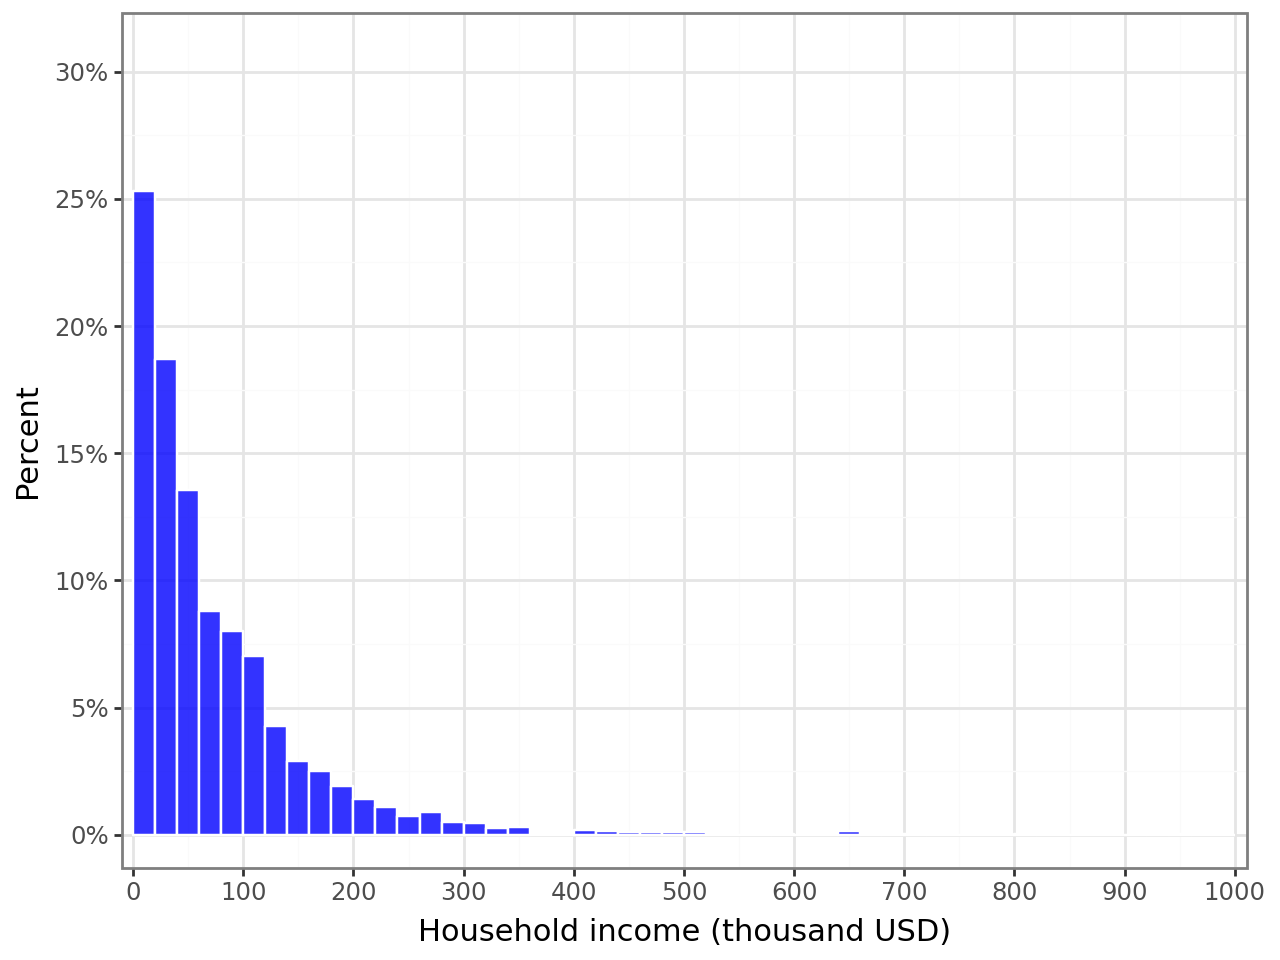

In [ ]:
(
    ggplot(filtered_women_income, aes(x="hhincome"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        binwidth=20,
        boundary=0,
        fill="blue",
        color="white",
        alpha=0.8,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Household income (thousand USD)")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 1001), breaks=np.arange(0, 1001, 100)
    )
    + scale_y_continuous(
        expand=(0.01, 0.01),
        limits=(0, 0.31),
        breaks=np.arange(0, 0.31, 0.05),
        labels=percent_format(),
    )
    + theme_bw()
)

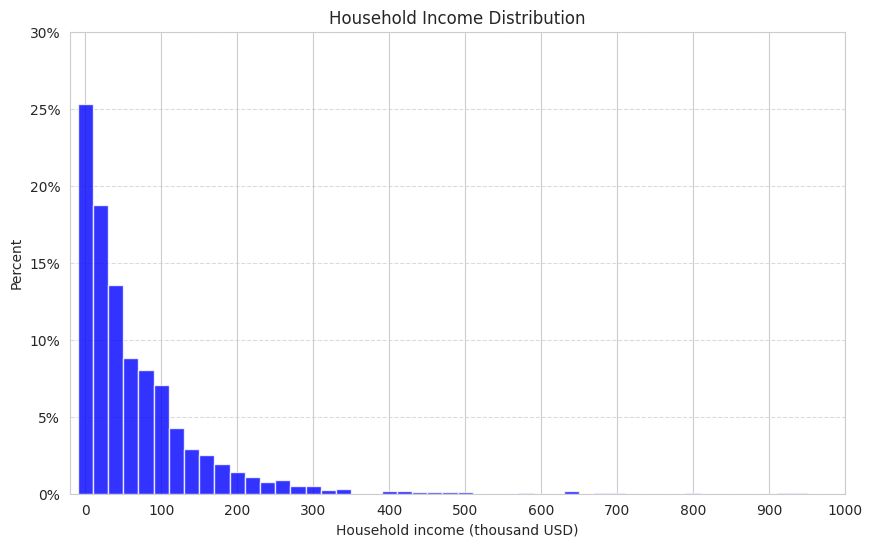

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = filtered_women_income['hhincome']

# Define bin edges starting at 0
bin_edges = np.arange(0, 1001, 20)
hist, bins = np.histogram(data, bins=bin_edges)
percentages = hist / hist.sum() * 100  # Convert counts to percentages

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bin_edges[:-1], percentages, width=20, color="blue", edgecolor="white", alpha=0.8)

# Add some space before 0 on the x-axis
ax.set_xlim(-20, 1000)  # Start x-axis slightly before 0

# Formatting
ax.set_xlabel("Household income (thousand USD)")
ax.set_ylabel("Percent")
ax.set_title("Household Income Distribution")
ax.set_xticks(np.arange(0, 1001, 100))  # Set x-axis ticks
ax.set_ylim(0, 30)  # Set y-axis limits
ax.set_yticks(np.arange(0, 31, 5))  # Set y-axis ticks
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Add % to y-axis labels
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import numpy as np

# Create a new column 'lnincome' as the natural logarithm of 'hhincome'
filtered_women_income['lnincome'] = np.log(filtered_women_income['hhincome'])

# Display the first few rows to verify
print(filtered_women_income[['hhincome', 'lnincome']].head())

       hhincome  lnincome
2     11.880120  2.474866
59    90.120000  4.501142
117  102.380000  4.628691
131   75.126162  4.319169
236   47.400000  3.858622


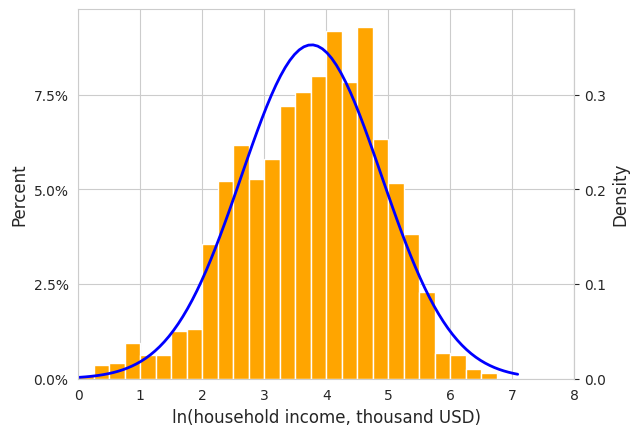

In [ ]:
fig, ax1 = plt.subplots()

# histogram
sns.histplot(
    filtered_women_income,
    x="lnincome",
    stat="density",
    bins=np.arange(0, 7, 0.25),
    edgecolor="white",
    color="orange",
    alpha=1,
    ax=ax1,
)

# calculate the norm. pdf
x0, x1 = ax1.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(
    x_pdf,
    loc=np.mean(filtered_women_income["lnincome"]),
    scale=np.std(filtered_women_income["lnincome"]),
)
ax1.plot(x_pdf, y_pdf, "blue", lw=2)

# add second axis
secax = ax1.secondary_yaxis("right")
secax.set_ylabel("Density", size=12)
secax.set_yticks(np.arange(0, 0.4, 0.1))

# formating
plt.ylabel("Percent", size=12)
plt.xlabel("ln(household income, thousand USD)", size=12)
plt.yticks(np.arange(0, 0.4, 0.1))
ax1.set_yticklabels([f"{i}%" for i in np.arange(0, 10, 2.5)])
plt.xlim(0, 8)
plt.show()